In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
train_data = pd.read_csv('Datasets/fashion-mnist_train.csv').to_numpy()
test_data = pd.read_csv('Datasets/fashion-mnist_test.csv').to_numpy()

In [30]:
y_train = train_data[:,0]
y_train = y_train.reshape(1,-1)
x_train = train_data[:, 1:] / 255.0
x_train = x_train.T 
y_test = test_data[:, 0]
y_test = y_test.reshape(1,-1)
x_test = test_data[:, 1:] / 255.0
x_test = x_test.T

In [31]:
def initialize_params():
    w1 = np.random.randn(128, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((128, 1))
    w2 = np.random.randn(64, 128) * np.sqrt(2. / 128)
    b2 = np.zeros((64, 1))
    w3 = np.random.randn(10, 64) * np.sqrt(2. / 64)
    b3 = np.zeros((10, 1))
    return w1, b1, w2, b2, w3, b3

In [32]:
def ReLU(z):
    return np.maximum(0,z)

def d_ReLU(z):
    return z > 0

In [33]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True)) 
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [34]:
def one_hot_encode(y):
    encoded_y = np.zeros((y.size, (y.max()+1)))
    encoded_y[np.arange(y.size), y] = 1
    return encoded_y.T

In [35]:
def forward(w1, b1, w2, b2, w3, b3, x):
    z1 = np.dot(w1, x) + b1
    a1 = ReLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = ReLU(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

In [36]:
def cross_entropy_loss(a3, y):
    m = y.shape[1]
    y_encoded = one_hot_encode(y)
    loss = -(np.sum(y_encoded*(np.log(a3 + 1e-8))))/m
    return loss

In [37]:
def backward(x, y, z1, a1, z2, a2, a3, w2, w3):
    m = y.shape[1]
    y_encoded = one_hot_encode(y)
    dz3 = a3 - y_encoded
    dw3 = (np.dot(dz3, a2.T))/m
    db3 = (np.sum(dz3, axis=1, keepdims=True))/m
    dz2 = (np.dot(w3.T, dz3)) * d_ReLU(z2)
    dw2 = (np.dot(dz2, a1.T))/m
    db2 = (np.sum(dz2, axis=1, keepdims=True))/m
    dz1 = (np.dot(w2.T, dz2)) * d_ReLU(z1)
    dw1 = (np.dot(dz1, x.T))/m
    db1 = (np.sum(dz1, axis=1, keepdims=True))/m
    return dw3, db3, dw2, db2, dw1, db1

In [38]:
def update_params(lr, w1, b1, w2, b2, w3, b3, dw3, db3, dw2, db2, dw1, db1):
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2
    w3 -= lr * dw3
    b3 -= lr * db3
    return w1, b1, w2, b2, w3, b3

In [39]:
def get_prediction(a3):
    return np.argmax(a3, 0)

In [40]:
def get_accuracy(y_pred, y):
    return np.mean(y_pred==y)

In [41]:
def gradient_descent(x, y, lr, num_epoch, min_iter = 10, max_iter = 10000):
    w1, b1, w2, b2, w3, b3 = initialize_params()
    loss_list = []
    for epoch in range(num_epoch):
        z1, a1, z2, a2, z3, a3 = forward(w1, b1, w2, b2, w3, b3, x)
        dw3, db3, dw2, db2, dw1, db1 = backward(x, y, z1, a1, z2, a2, a3, w2, w3)
        w1, b1, w2, b2, w3, b3 = update_params(lr, w1, b1, w2, b2, w3, b3, dw3, db3, dw2, db2, dw1, db1)

        loss = cross_entropy_loss(a3, y)
        loss_list.append(loss)
        
        print(f'Epoch: {epoch+1}')
        print(f'Loss {loss}')
        print(f'Accuracy {get_accuracy(get_prediction(a3), y)}')
        print('-' * 50)
        
        if (epoch > min_iter) and (abs(loss_list[-1] - loss_list[-2]) < 1e-5):
            break
        if epoch > max_iter:
            break
        
    return w1, b1, w2, b2, w3, b3

In [42]:
def predict(x, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, a3 = forward(w1, b1, w2, b2, w3, b3, x)
    return get_prediction(a3)

In [43]:
w1, b1, w2, b2, w3, b3 = gradient_descent(x_train, y_train, lr=0.3, num_epoch=1000)

Epoch: 1
Loss 2.301200195454071
Accuracy 0.13906666666666667
--------------------------------------------------
Epoch: 2
Loss 2.045095315356601
Accuracy 0.3857333333333333
--------------------------------------------------
Epoch: 3
Loss 2.0061316915027687
Accuracy 0.31215
--------------------------------------------------
Epoch: 4
Loss 2.243313086875908
Accuracy 0.4356833333333333
--------------------------------------------------
Epoch: 5
Loss 1.8481175553594626
Accuracy 0.32813333333333333
--------------------------------------------------
Epoch: 6
Loss 1.6688325579897207
Accuracy 0.37878333333333336
--------------------------------------------------
Epoch: 7
Loss 1.5395295370466677
Accuracy 0.4346833333333333
--------------------------------------------------
Epoch: 8
Loss 2.2874321312794366
Accuracy 0.26071666666666665
--------------------------------------------------
Epoch: 9
Loss 1.8445562450937507
Accuracy 0.4071666666666667
--------------------------------------------------
Ep

In [49]:
y_pred = predict(x_test, w1, b1, w2, b2, w3, b3)
test_accuracy = get_accuracy(y_pred, y_test)
print(f'Test accuracy: {test_accuracy * 100} % ')

Test accuracy: 87.05000000000001 % 


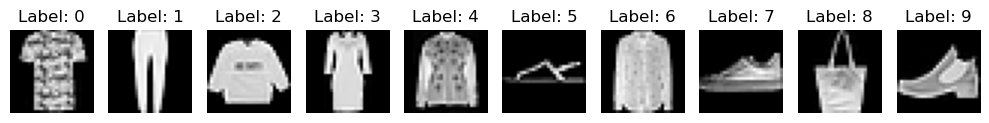

In [45]:
y_train = y_train.flatten()
labels = np.unique(y_train)
plt.figure(figsize=(10,5))
for label in range(len(labels)):
    idx = np.where(y_train == label)[0]
    img = x_train[:, idx[0]].reshape(28, 28)
    plt.subplot(1, 10, label + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {label}")
plt.tight_layout()
plt.show()


In [46]:
label_dict = {
    0 : 't-shirt',
    1 : 'pant',
    2 : 'hoodie',
    3 : 'dress',
    4 : 'jacket',
    5 : 'sandal',
    6 : 'shirt',
    7 : 'shoe',
    8 : 'bag',
    9 : 'heels'
}

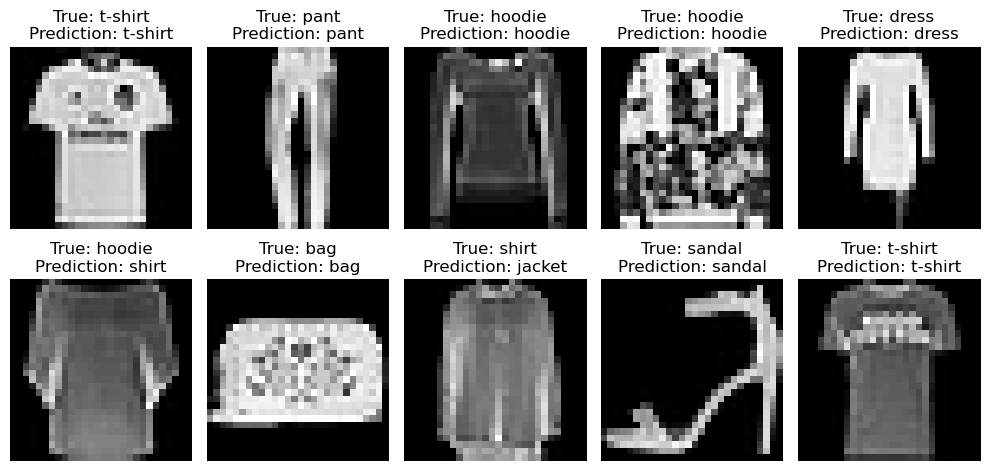

In [54]:
y_pred = y_pred.flatten()
y_test = y_test.flatten()
plt.figure(figsize=(10, 5))
for i in range(10):
    img = x_test[:, i].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    true_label = label_dict[y_test[i].item()]
    pred_label = label_dict[y_pred[i].item()]
    plt.title(f"True: {true_label}\nPrediction: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()